Informe de Análisis de Datos y Predicción de Precios de Mercado Libre

Análisis Exploratorio de Datos:

Se cargaron los datos históricos de precios de Mercado Libre desde un archivo CSV.
Se observó que el conjunto de datos contiene 1259 observaciones y 7 características.
Se realizó un análisis estadístico descriptivo para comprender la distribución de los datos.
Se visualizó la tendencia de los precios máximos históricos a lo largo del tiempo, mostrando una tendencia general al alza con fluctuaciones periódicas.
Volatilidad y Detección de Anomalías:

Se calculó la volatilidad diaria de los precios máximos, proporcionando información sobre la variabilidad de los precios.
Se identificaron anomalías en los datos, utilizando tanto un enfoque basado en percentiles como el modelo de Detección de Anomalías Multivariadas (Elliptic Envelope).
Modelado Predictivo:

Se exploraron modelos de regresión lineal y Random Forest para predecir los precios futuros de las acciones.
Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
Los modelos demostraron un alto coeficiente de determinación (
𝑅
2
R 
2
 ), indicando una buena capacidad de predicción.
Conclusiones:

El análisis revela patrones interesantes en los datos históricos de precios de Mercado Libre, así como la presencia de anomalías.
Los modelos de regresión mostraron un buen desempeño en la predicción de los precios futuros de las acciones, lo que sugiere que estos enfoques pueden ser útiles para los inversionistas y analistas.
Recomendaciones:

Se recomienda continuar explorando diferentes modelos de predicción y técnicas de análisis para mejorar la precisión de las predicciones.
Además, se sugiere realizar un análisis más profundo de las anomalías detectadas para comprender mejor su naturaleza y posibles implicaciones.
Referencias:

Pandas Documentation: https://pandas.pydata.org/docs/
Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html
Matplotlib Documentation: https://matplotlib.org/stable/contents.html


In [277]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [278]:
data =  pd.read_csv('MercadoLibre.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,565.580017,580.429993,562.309998,567.690002,567.690002,625100
1,2019-05-07,557.909973,562.619995,535.119995,539.409973,539.409973,727000
2,2019-05-08,536.289978,554.369995,535.659973,536.059998,536.059998,541200
3,2019-05-09,529.479980,551.369995,520.869995,542.640015,542.640015,546700
4,2019-05-10,542.700012,558.770020,536.580017,557.840027,557.840027,544400
5,2019-05-13,540.020020,549.849976,539.159973,543.030029,543.030029,664500
6,2019-05-14,551.239990,565.000000,546.960022,562.690002,562.690002,660000
7,2019-05-15,558.239990,582.479980,558.239990,572.929993,572.929993,583100
8,2019-05-16,573.570007,596.700012,573.570007,595.729980,595.729980,698100
9,2019-05-17,585.010010,589.890015,573.630005,574.570007,574.570007,551600


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [280]:
data.shape

(1259, 7)

In [281]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1133.392559,1154.641755,1110.157030,1132.484997,1132.484997,5.304213e+05
std,392.752315,395.946548,386.802577,391.550406,391.550406,2.566905e+05
min,445.470001,460.959991,422.220001,447.339996,447.339996,1.090000e+05
25%,805.454987,831.075012,782.985016,804.339996,804.339996,3.548000e+05
50%,1170.010010,1192.489990,1145.869995,1170.300049,1170.300049,4.750000e+05
75%,1453.674988,1484.565002,1428.079956,1448.445007,1448.445007,6.370500e+05
max,2020.000000,2020.000000,1929.520020,1984.339966,1984.339966,2.359100e+06


# Tendencia de precios máximos históricos de Mercado Libre

In [282]:
data['Date'] = pd.to_datetime(data['Date'])

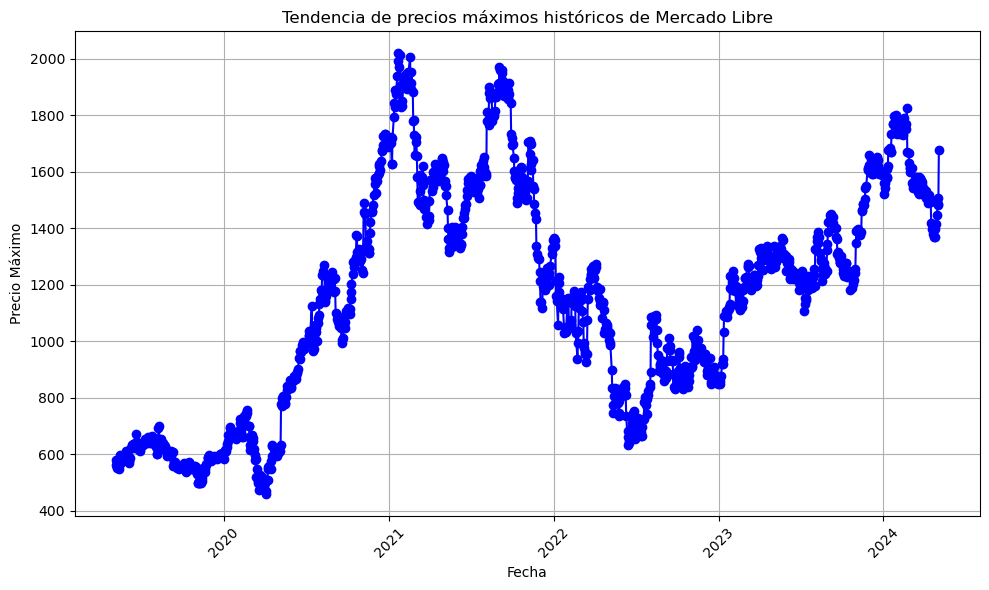

In [283]:
# Ordenar el DataFrame por fecha
data = data.sort_values(by='Date')

# Crear un gráfico de línea para visualizar la tendencia de los precios máximos históricos
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['High'], color='blue', marker='o', linestyle='-')
plt.title('Tendencia de precios máximos históricos de Mercado Libre')
plt.xlabel('Fecha')
plt.ylabel('Precio Máximo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis de volatilidad

In [284]:
data['Daily Returns'] = data['High'].pct_change()

# Calcular la volatilidad como la desviación estándar de los rendimientos diarios
volatility = data['Daily Returns'].std()

print("Volatilidad diaria:", volatility)

Volatilidad diaria: 0.030693290180072684


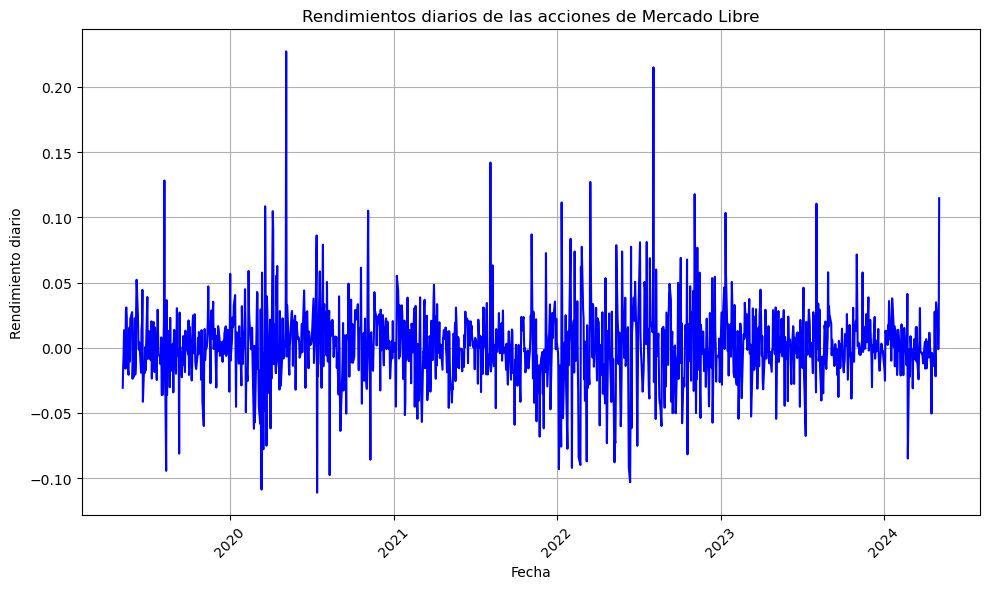

In [285]:
# Graficar los rendimientos diarios
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily Returns'], color='blue', linestyle='-')
plt.title('Rendimientos diarios de las acciones de Mercado Libre')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Deteccion de anomalias

In [286]:
# Calcular el percentil 95 de los precios máximos históricos
percentile_95 = data['High'].quantile(0.95)

# Identificar las anomalías como aquellas observaciones que están por encima del percentil 95
anomalies = data[data['High'] > percentile_95]

print("Anomalías detectadas:")
print(anomalies)

Anomalías detectadas:
           Date         Open         High          Low        Close  \
426  2021-01-12  1792.079956  1845.250000  1777.949951  1810.089966   
427  2021-01-13  1823.000000  1830.000000  1766.689941  1798.189941   
428  2021-01-14  1814.000000  1889.619995  1814.000000  1852.530029   
429  2021-01-15  1860.010010  1877.109985  1805.459961  1851.780029   
430  2021-01-19  1888.170044  1938.170044  1861.000000  1913.209961   
...         ...          ...          ...          ...          ...   
602  2021-09-23  1895.000000  1913.770020  1869.000000  1886.489990   
603  2021-09-24  1858.699951  1876.939941  1830.000000  1869.619995   
604  2021-09-27  1842.560059  1844.949951  1755.579956  1768.150024   
1191 2024-01-29  1796.979980  1800.089966  1760.150024  1777.430054   
1208 2024-02-22  1767.640015  1825.000000  1760.349976  1817.979980   

        Adj Close  Volume  Daily Returns  
426   1810.089966  616300       0.028120  
427   1798.189941  506700      -0.00826

In [287]:
from sklearn.covariance import EllipticEnvelope

# Supongamos que tienes un DataFrame llamado df que contiene tus datos
# Asegúrate de tener una columna 'High' que contenga los precios máximos históricos

# Inicializar y ajustar el modelo de Detección de Anomalías Multivariadas (Elliptic Envelope)
envelope = EllipticEnvelope(contamination=0.05)  # Contaminación del 5%
envelope.fit(data[['High']])

# Identificar las anomalías
anomalies_mask = envelope.predict(data[['High']]) == -1
anomalies = data[anomalies_mask]

print("Anomalías detectadas:")
print(anomalies)

Anomalías detectadas:
           Date         Open         High          Low        Close  \
220  2020-03-19   450.000000   474.089996   436.230011   463.529999   
226  2020-03-27   479.410004   485.899994   455.410004   471.429993   
229  2020-04-01   466.000000   468.989990   435.040009   447.339996   
230  2020-04-02   445.470001   472.200012   443.000000   462.869995   
231  2020-04-03   452.720001   460.959991   443.010010   454.470001   
...         ...          ...          ...          ...          ...   
601  2021-09-22  1850.760010  1888.839966  1840.900024  1879.489990   
602  2021-09-23  1895.000000  1913.770020  1869.000000  1886.489990   
603  2021-09-24  1858.699951  1876.939941  1830.000000  1869.619995   
604  2021-09-27  1842.560059  1844.949951  1755.579956  1768.150024   
1208 2024-02-22  1767.640015  1825.000000  1760.349976  1817.979980   

        Adj Close  Volume  Daily Returns  
220    463.529999  673000      -0.048203  
226    471.429993  578200      -0.02973

# Predicción de precios de acciones: Utilizando técnicas de modelado predictivo para predecir el precio futuro de las acciones de la empresa. Exploramos modelos como regresión lineal y random forest 

In [288]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

In [300]:
data.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7164\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Open,1.000000,0.998798,0.998351,0.996834,0.996834,-0.240316,0.004103
High,0.998798,1.000000,0.998307,0.998457,0.998457,-0.225905,0.027756
Low,0.998351,0.998307,1.000000,0.998796,0.998796,-0.260655,0.021852
Close,0.996834,0.998457,0.998796,1.000000,1.000000,-0.245589,0.036475
Adj Close,0.996834,0.998457,0.998796,1.000000,1.000000,-0.245589,0.036475
Volume,-0.240316,-0.225905,-0.260655,-0.245589,-0.245589,1.000000,0.064504
Daily Returns,0.004103,0.027756,0.021852,0.036475,0.036475,0.064504,1.000000


In [290]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']


In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [293]:
r2_score = model.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2_score)

Coeficiente de determinación (R^2): 0.9989053094376691


In [294]:
predictions = model.predict(X_test)

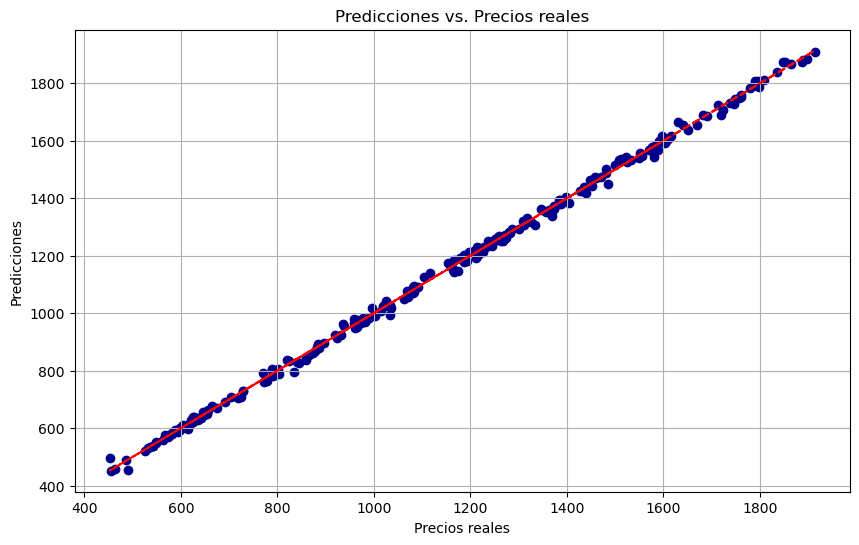

In [295]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='darkblue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Valores reales')
plt.xlabel('Precios reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Precios reales')
plt.grid(True)
plt.show()

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [297]:
random = RandomForestRegressor(n_estimators= 100, random_state=42)

random.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [298]:
r2_score = random.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2_score)

Coeficiente de determinación (R^2): 0.9972404899157818
